# TAKE HOME QUIZ 1.B
Lucieni Saldanha

## Activities

    - Pick some data set (ground truth)
    - Generate a prediction set ( to be compared to ground truth)
    - Analyze predictions and ground truth applying evalution metrics, and explain results
    

## Actual and Prediction Data

### Kaggle dataset - actual data


In [12]:
# Download a training set from kaggle ( Titanic challenge - binary classification)
# transform csv file to a pandas dataframe 
import pandas as pd
data = pd.read_csv("./train.csv")
data.shape

(891, 12)

We see that our dataset has 891 rows of data, and 12 columns.

In [13]:
# visualize the list of columns in dataframe/dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# visualize the first 5 rows of our dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We are only interested in the column 'Survived', to obtain a list of 0 and 1. The 'Survived' column with value equal to 0 meant the person did not survive , and for the value equal to 1 the person survived.

In [15]:
# select only column needed for evaluation
is_survived = data.Survived
print(is_survived.head(10))

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


In [16]:
# check for integrity of selected values
print(len(is_survived))

891


### Generating prediction data randomly


Lets generate a random list (that will be our predictions list), and populate it with 0 and 1.

In [17]:
# generate a list with 891 elements, and shuffle elements.
import random
model_predictions = [0] * 245 + [1] * 646

random.shuffle(model_predictions)

print(model_predictions[0:10])


[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [18]:
# turn list into a dataframe
model_predictions_df = pd.DataFrame(model_predictions, columns=["Prediction"])

print(model_predictions_df.shape)


(891, 1)


In [19]:
# print first 10 rows of predicted data
print(model_predictions_df.head(10))

   Prediction
0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           0


So far, we have obtained a data set with real values, is_survived, and generated a prediction data set, model_predictions_df.


## Evaluation
We need to evaluate the data is_survived and the model_predictions_df, using evaluation metrics for our binary classification problem.
The metrics to be used:
    
    - Accuracy 
    - Precision-Recall
    - ROC_AUC
    - Log-loss
     

### Confusion matrix and Accuracy

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import *

# check for confusion matrix

conf_ma = confusion_matrix(is_survived, model_predictions_df)
conf_ma_df = pd.DataFrame(conf_ma)

print(conf_ma_df.head())


     0    1
0  154  395
1   91  251


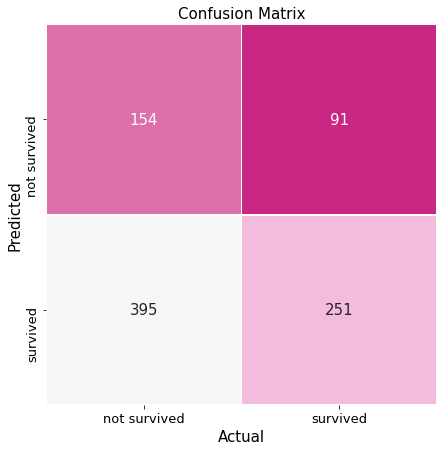

In [21]:
# show Confusion Matrix
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(conf_ma_df.T, annot=True, annot_kws={"size": 15}, cmap="PiYG", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["not survived","survived"], yticklabels=["no fraud","survived"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["not survived","survived"], fontsize=13)
ax.set_yticklabels(["not survived","survived"], fontsize=13)
plt.title("Confusion Matrix", fontsize=15)

plt.show()

From the data frame matrix, the true positive, true negative, false positive and false negative values are:

In [22]:
tp = conf_ma_df.iloc[1,1]
tn = conf_ma_df.iloc[0,0]
fp = conf_ma_df.iloc[0,1]
fn = conf_ma_df.iloc[1,0]
print(f"True Positive: {tp}",f"True Negative: {tn}",f"False Positive: {fp}",f"False Negative: {fn}", sep='\n' )

True Positive: 251
True Negative: 154
False Positive: 395
False Negative: 91


In [23]:
# calculate accuracy of our random model 
accuracy = (tp + tn)/(tp + tn + fp + fn)
print(round(accuracy,3))

0.455


Our model can predict outcomes with a 45.5% accuracy.

Checking precision,sensitivity, and specificity of our model:


In [24]:
precision = round(tp / (tp + fp),3)
sensitivity = round(tp / (tp + fn),3)
specificity = round(tn / (tn + fp),3)
fscore = round(2*((precision * sensitivity)/(precision + sensitivity)),3)

print(f"Precision value for our model: {precision}.",
      f"Sensitivy value for our model: {sensitivity}.",
      f"Specificity value for our model: {specificity}.", 
      f"Fscore value for our model: {fscore}.", sep="\n")

Precision value for our model: 0.389.
Sensitivy value for our model: 0.734.
Specificity value for our model: 0.281.
Fscore value for our model: 0.509.


Our model has a low value for precision (0.389), it has many false positives, predicting wrongly positive cases (survival is not classified correctly). However, the sensitivy is a bit high (0.734), meaning low value for false negatives, model does not miss much the survival cases. 
Fscore is the geometric mean of the precision and recall, with a value of 0.509. This metric is useful when we have different costs for the false positives or false negatives, as for example the COVID test case, and/or when there is a large class imbalance or unevenly distributed, same situation with COVID test, with low percentage of population being the positive case target. 

### ROC-AUC curve
AUC - ROC curve helps to visualize the performance of classification problems. It tells us how much the model can distinguish the classes. Higher AUC, the better the model is at predicting 0s as 0s and 1s as 1s.
AUC stands for area under the curve, and ROC stands for receiver operating characteristics. 



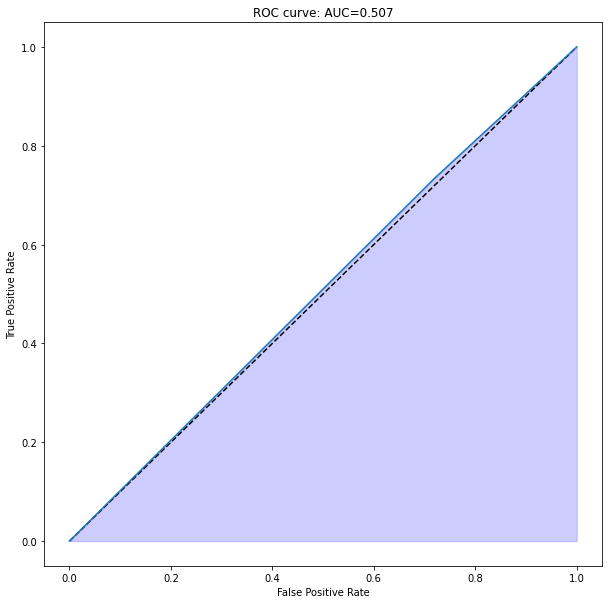

In [25]:
# generating report
report = classification_report(is_survived,model_predictions_df,digits=3,output_dict = True)

# Plot the ROC curve
# Generate points to plot on ROC curve 
fpr_model, tpr_model, thresholds_ = roc_curve(is_survived, model_predictions_df[:])

fig, ax = plt.subplots(figsize = (10,10))

# Plot the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')

# Plot the random
plt.plot(fpr_model, tpr_model)
plt.fill_between(fpr_model, tpr_model, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.3f}'.format(roc_auc_score(is_survived,model_predictions_df[:])))
plt.show()

In [26]:
auc = roc_auc_score(is_survived,model_predictions_df[:])
print(round(auc,3))

0.507



Our model has the AUC equal to 0.517, which means that our random model can not discriminate the classes in our classification problem. This is the worst situation case.

### Precision-Recall
Lets examine the effectiveness of our random model using precision and recall. We plot the precision and recall for different threshold values.




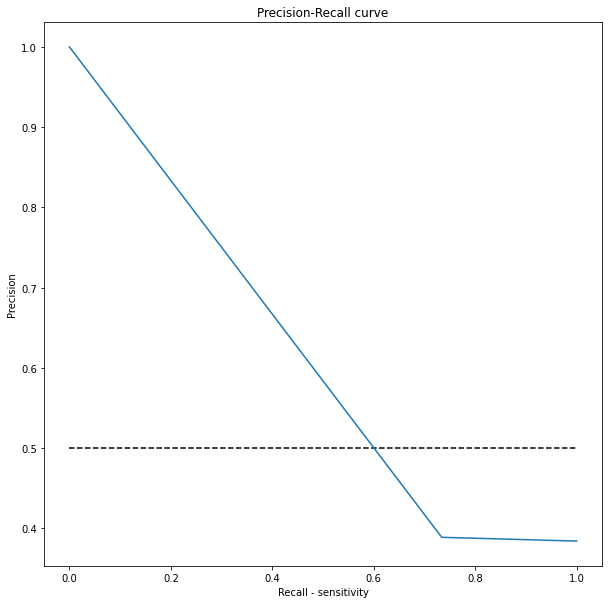

In [27]:
# generate points for the plot of the recall precision curve
precision, recall, thresholds = precision_recall_curve(is_survived, model_predictions_df)

plt.figure(figsize = (10,10))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision)
plt.xlabel('Recall - sensitivity')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


Generally, a good precision-recall curve will passes through the right corner (which would correspond to 100% precision and 100% recall). That would mean fp and fn equal to zero. Observing the curve, our model performed terrible, being far from the right upper corner. This is confirmed because we have a low value for the precision, and a high value for the sensitivity (precision: 0.395; sensitivy: 0.746).
A high sensitivity value for the model means it minimizes false negatives.An increase in recall often means a decrease in precision (in our case it did happen).

### Log-Loss